In [1]:
!pip install yfinance
!pip install prophet

In [2]:
import yfinance as yf

perionnetwork = "PERI"

start = "2018-1-1"
end = "2023-12-31"

data = yf.download(perionnetwork, start = start, end = end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

Open       High        Low      Close  Adj Close  Volume
Date                                                                     
2018-01-02   3.030000   3.180000   3.030000   3.090000   3.090000   20567
2018-01-03   3.150000   3.150000   3.060000   3.060000   3.060000   31800
2018-01-04   3.060000   3.150000   3.000000   3.090000   3.090000   27867
2018-01-05   3.120000   3.150000   3.120000   3.120000   3.120000   12033
2018-01-08   3.150000   3.390000   3.150000   3.270000   3.270000   59733
...               ...        ...        ...        ...        ...     ...
2023-12-22  30.410000  30.790001  29.900000  30.049999  30.049999  249300
2023-12-26  30.100000  30.950001  29.860001  30.719999  30.719999  290200
2023-12-27  30.940001  31.320000  30.670000  30.959999  30.959999  281600
2023-12-28  31.000000  31.600000  30.910000  31.250000  31.250000  324100
2023-12-29  31.110001  31.559999  30.830000  30.870001  30.870001  253200

[1509 rows x 6 columns]

In [4]:
import pandas as pd
data.reset_index(inplace=True)  # Нулиране на индекса, за да стане 'Date' колона
print(data.columns)
data = data[["Date","Close"]]
data.columns = ["ds","y"]
data

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


ds          y
0    2018-01-02   3.090000
1    2018-01-03   3.060000
2    2018-01-04   3.090000
3    2018-01-05   3.120000
4    2018-01-08   3.270000
...         ...        ...
1504 2023-12-22  30.049999
1505 2023-12-26  30.719999
1506 2023-12-27  30.959999
1507 2023-12-28  31.250000
1508 2023-12-29  30.870001

[1509 rows x 2 columns]

In [5]:
train_data = data[(data['ds'] >= '2018-01-01') & (data['ds'] <= '2022-12-31')]
test_data = data[(data['ds'] >= '2023-01-01') & (data['ds'] <= '2023-12-31')]

In [6]:
import io, os, sys, setuptools, tokenize
from prophet import Prophet
p = Prophet(daily_seasonality=True)
p.fit(train_data)
future = p.make_future_dataframe(periods=365)
data_forecast = p.predict(future)

08:43:19 - cmdstanpy - INFO - Chain [1] start processing
08:43:20 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
data_forecast

ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2018-01-02   2.901468    1.342929    5.836425     2.901468     2.901468   
1    2018-01-03   2.908438    1.314837    5.617318     2.908438     2.908438   
2    2018-01-04   2.915408    1.525112    5.594191     2.915408     2.915408   
3    2018-01-05   2.922378    1.340798    5.350928     2.922378     2.922378   
4    2018-01-08   2.943287    1.189575    5.182947     2.943287     2.943287   
...         ...        ...         ...         ...          ...          ...   
1619 2023-12-26  23.499581   19.387712   29.844126    19.324102    28.850020   
1620 2023-12-27  23.501085   19.543824   29.868625    19.305606    28.873299   
1621 2023-12-28  23.502590   19.606780   29.682061    19.287110    28.896489   
1622 2023-12-29  23.504095   19.656864   29.763504    19.268613    28.923415   
1623 2023-12-30  23.505600   19.659551   30.478248    19.250117    28.975498   

      additive_terms  additive_terms_lower  additive_terms_upper     daily  \
0           0.700459              0.700459              0.700459 -0.609857   
1           0.655761              0.655761              0.655761 -0.609857   
2           0.576559              0.576559              0.576559 -0.609857   
3           0.479647              0.479647              0.479647 -0.609857   
4           0.263941              0.263941              0.263941 -0.609857   
...              ...                   ...                   ...       ...   
1619        0.709223              0.709223              0.709223 -0.609857   
1620        0.725711              0.725711              0.725711 -0.609857   
1621        0.709545              0.709545              0.709545 -0.609857   
1622        0.676182              0.676182              0.676182 -0.609857   
1623        0.822390              0.822390              0.822390 -0.609857   

      ...    weekly  weekly_lower  weekly_upper    yearly  yearly_lower  \
0     ...  0.015846      0.015846      0.015846  1.294470      1.294470   
1     ...  0.008575      0.008575      0.008575  1.257043      1.257043   
2     ... -0.024807     -0.024807     -0.024807  1.211223      1.211223   
3     ... -0.068059     -0.068059     -0.068059  1.157562      1.157562   
4     ... -0.084020     -0.084020     -0.084020  0.957817      0.957817   
...   ...       ...           ...           ...       ...           ...   
1619  ...  0.015846      0.015846      0.015846  1.303234      1.303234   
1620  ...  0.008575      0.008575      0.008575  1.326993      1.326993   
1621  ... -0.024807     -0.024807     -0.024807  1.344208      1.344208   
1622  ... -0.068059     -0.068059     -0.068059  1.354097      1.354097   
1623  ...  0.076232      0.076232      0.076232  1.356015      1.356015   

      yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0         1.294470                   0.0                         0.0   
1         1.257043                   0.0                         0.0   
2         1.211223                   0.0                         0.0   
3         1.157562                   0.0                         0.0   
4         0.957817                   0.0                         0.0   
...            ...                   ...                         ...   
1619      1.303234                   0.0                         0.0   
1620      1.326993                   0.0                         0.0   
1621      1.344208                   0.0                         0.0   
1622      1.354097                   0.0                         0.0   
1623      1.356015                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
0                            0.0   3.601927  
1                            0.0   3.564199  
2                            0.0   3.491967  
3                            0.0   3.402024  
4                            0.0   3.207228  
...                          ...        ...  
1619                       

D:\JN\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  v = v.dt.to_pydatetime()


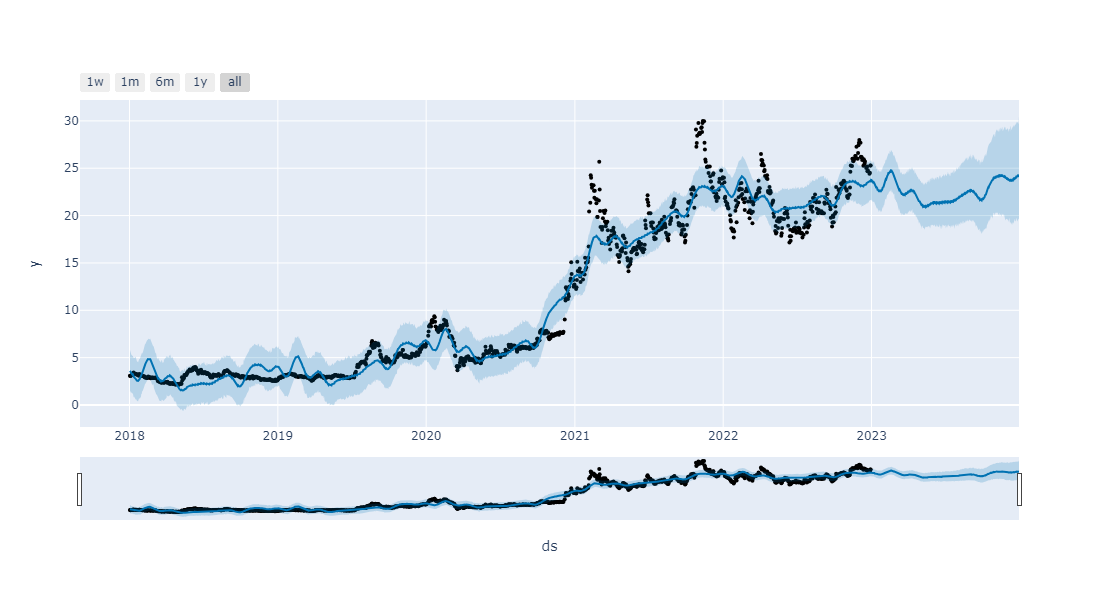

In [8]:
from prophet.plot import plot_plotly
plot_plotly(p, data_forecast)

D:\JN\Lib\site-packages\prophet\plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:397: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future

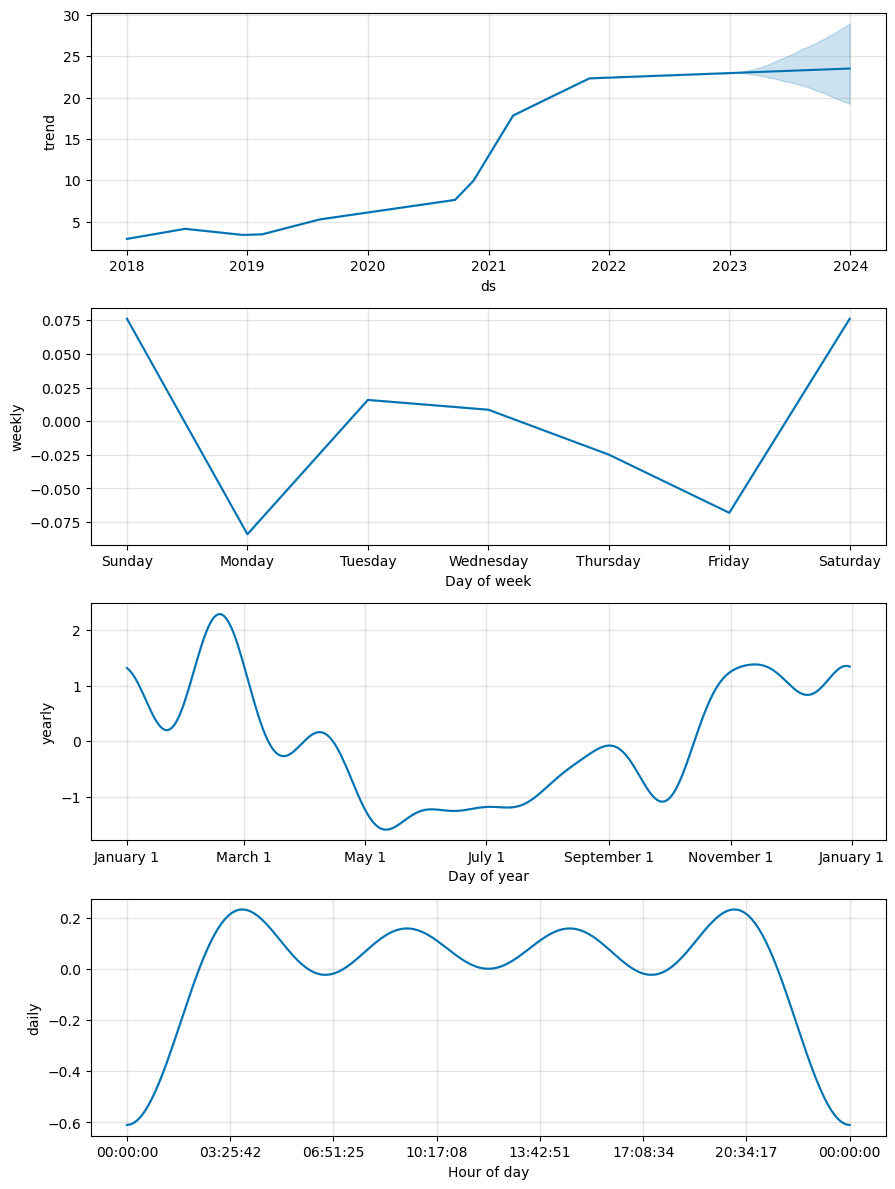

In [9]:
tesla_data_plot = p.plot_components(data_forecast)

D:\JN\Lib\site-packages\prophet\plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

D:\JN\Lib\site-packages\prophet\plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



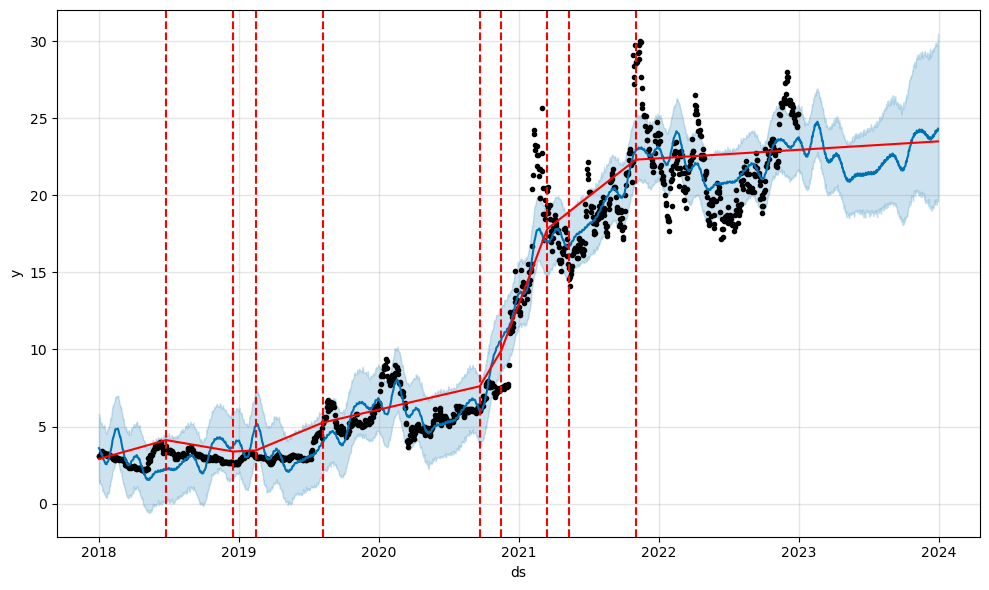

In [10]:
from prophet.plot import add_changepoints_to_plot
fig = p.plot(data_forecast)
a = add_changepoints_to_plot(fig.gca(), p, data_forecast)

<Axes: xlabel='ds'>

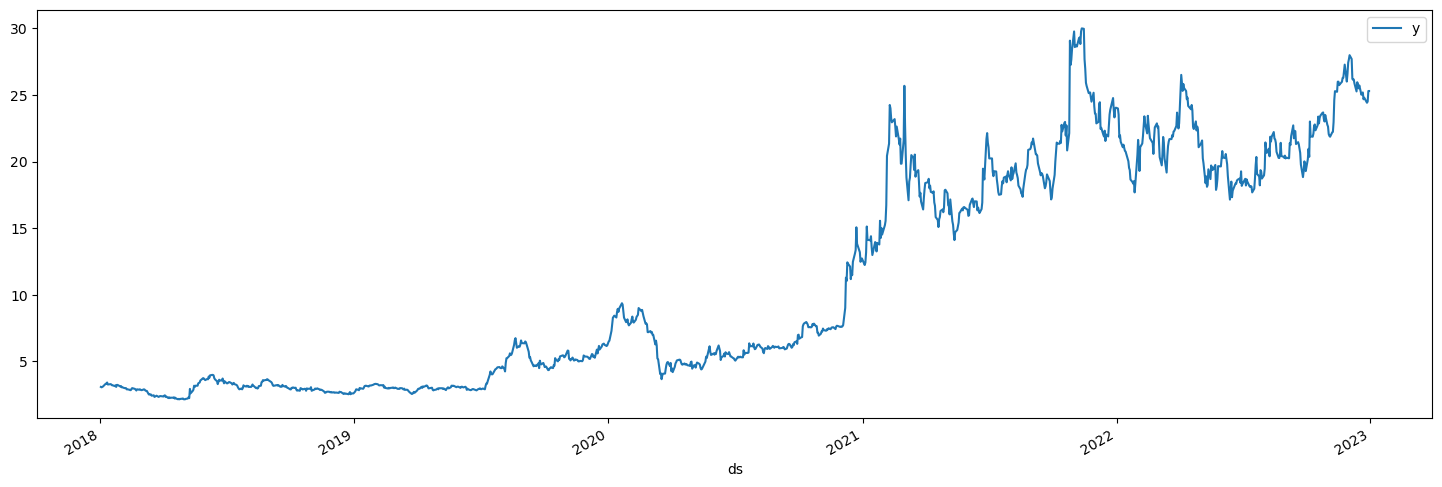

In [11]:
train_data.plot(x='ds',y='y',figsize=(18,6))

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

test_forecast = data_forecast[(data_forecast['ds'] >= '2023-01-01') & (data_forecast['ds'] <= '2023-12-31')]
test_forecast = test_forecast[test_forecast['ds'].isin(test_data['ds'])]

rmse = mean_squared_error(test_data['y'], test_forecast['yhat'], squared=False)
mae = mean_absolute_error(test_data['y'], test_forecast['yhat'])
mape = np.mean(np.abs((test_data['y'] - test_forecast['yhat']) / test_data['y'])) * 100

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'MAPE: {mape}')

RMSE: 10.61706635276606
MAE: 9.809487887225936
MAPE: 30.443804491980103


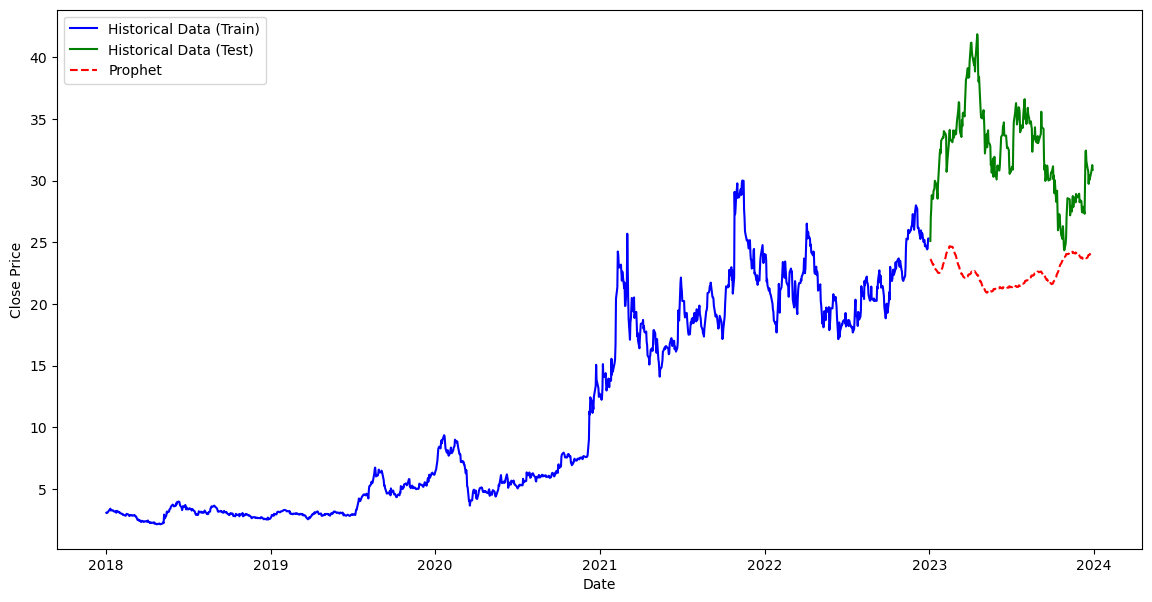

In [13]:
import matplotlib.pyplot as plt

# Визуализация на историческите данни и прогнозата
plt.figure(figsize=(14, 7))
plt.plot(train_data['ds'], train_data['y'], label='Historical Data (Train)', color='blue')
plt.plot(test_data['ds'], test_data['y'], label='Historical Data (Test)', color='green')
plt.plot(test_data['ds'], test_forecast['yhat'], label='Prophet', color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()